<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #1E86D1;">
    <h1 style="color:#2E06C1; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">Project:- GAN Anime Face Detection</h1>

<style>
    @keyframes textAnimation9 {
        0% { color: #D35430; }
        50% { color: #E67E52; }
        100% { color: #2E86C1; }
    }
</style>

<div style="border: 3px solid #D35400; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px pink; background-color: #F5EBEA; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Lucida Handwriting', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: #1E86D1; font-weight: bold; animation: textAnimation9 10s infinite alternate;">Import Dataset using Dir</p>
</div>

In [1]:
DATA_DIR = "/kaggle/input/animefacedataset"

<style>
    @keyframes textAnimation9 {
        0% { color: #D35430; }
        50% { color: #E67E52; }
        100% { color: #2E86C1; }
    }
</style>

<div style="border: 3px solid #D35400; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px pink; background-color: #F5EBEA; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Lucida Handwriting', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: #1E86D1; font-weight: bold; animation: textAnimation9 10s infinite alternate;">Useful Libraries</p>
</div>

In [2]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as T
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

<style>
    @keyframes textAnimation9 {
        0% { color: #D35430; }
        50% { color: #E67E52; }
        100% { color: #2E86C1; }
    }
</style>

<div style="border: 3px solid #D35400; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px pink; background-color: #F5EBEA; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Lucida Handwriting', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: #1E86D1; font-weight: bold; animation: textAnimation9 10s infinite alternate;">Image Data Preprocessing Parameters</p>
</div>

In [3]:
image_size = 64
batch_size = 128
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)

<style>
    @keyframes textAnimation9 {
        0% { color: #D35430; }
        50% { color: #E67E52; }
        100% { color: #2E86C1; }
    }
</style>

<div style="border: 3px solid #D35400; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px pink; background-color: #F5EBEA; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Lucida Handwriting', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: #1E86D1; font-weight: bold; animation: textAnimation9 10s infinite alternate;">Images Preprocessing for Model Training </p>
</div>

In [4]:
train_ds = ImageFolder(DATA_DIR, transform=T.Compose([
    T.Resize(image_size),
    T.CenterCrop(image_size),
    T.ToTensor(),
    T.Normalize(*stats)]))

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)

<style>
    @keyframes textAnimation9 {
        0% { color: #D35430; }
        50% { color: #E67E52; }
        100% { color: #2E86C1; }
    }
</style>

<div style="border: 3px solid #D35400; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px pink; background-color: #F5EBEA; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Lucida Handwriting', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: #1E86D1; font-weight: bold; animation: textAnimation9 10s infinite alternate;">Denormalize Image</p>
</div>

In [5]:
def denorm(img_tensors):
    return img_tensors * stats[1][0] + stats[0][0]

<style>
    @keyframes textAnimation9 {
        0% { color: #D35430; }
        50% { color: #E67E52; }
        100% { color: #2E86C1; }
    }
</style>

<div style="border: 3px solid #D35400; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px pink; background-color: #F5EBEA; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Lucida Handwriting', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: #1E86D1; font-weight: bold; animation: textAnimation9 10s infinite alternate;">Visualizing Image Batches</p>
</div>

In [6]:
def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(denorm(images.detach()[:nmax]), nrow=8).permute(1, 2, 0))

def show_batch(dl, nmax=64):
    for images, _ in dl:
        show_images(images, nmax)
        break

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


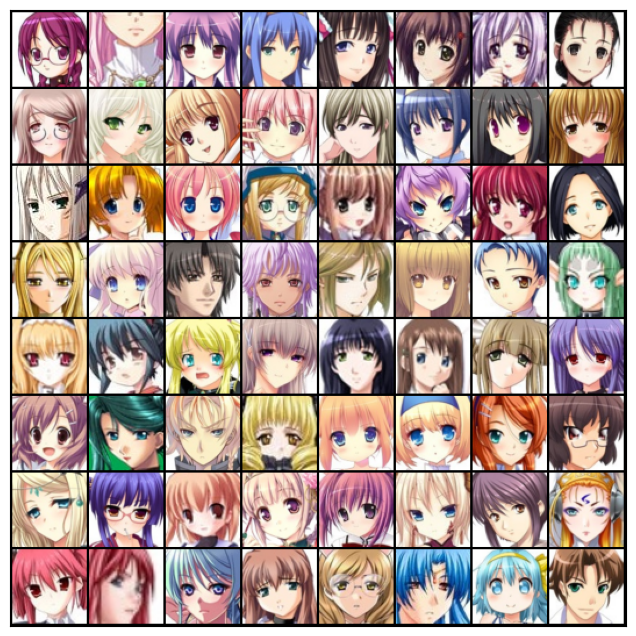

In [7]:
show_batch(train_dl)

<style>
    @keyframes textAnimation9 {
        0% { color: #D35430; }
        50% { color: #E67E52; }
        100% { color: #2E86C1; }
    }
</style>

<div style="border: 3px solid #D35400; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px pink; background-color: #F5EBEA; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Lucida Handwriting', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: #1E86D1; font-weight: bold; animation: textAnimation9 10s infinite alternate;">Data Processing</p>
</div>

In [8]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [9]:
device = get_default_device()
device

device(type='cpu')

In [10]:
train_dl = DeviceDataLoader(train_dl, device)

In [11]:
import torch.nn as nn

<style>
    @keyframes textAnimation9 {
        0% { color: #D35430; }
        50% { color: #E67E52; }
        100% { color: #2E86C1; }
    }
</style>

<div style="border: 3px solid #D35400; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px pink; background-color: #F5EBEA; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Lucida Handwriting', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: #1E86D1; font-weight: bold; animation: textAnimation9 10s infinite alternate;">Convolutional Discriminator Architecture for GANs</p>
</div>

In [12]:
discriminator = nn.Sequential(
    # in: 3 x 64 x 64

    nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 64 x 32 x 32

    nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 128 x 16 x 16

    nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 256 x 8 x 8

    nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(512),
    nn.LeakyReLU(0.2, inplace=True),
    # out: 512 x 4 x 4

    nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=0, bias=False),
    # out: 1 x 1 x 1

    nn.Flatten(),
    nn.Sigmoid())


In [13]:
discriminator = to_device(discriminator, device)

In [14]:
latent_size = 128


<style>
    @keyframes textAnimation9 {
        0% { color: #D35430; }
        50% { color: #E67E52; }
        100% { color: #2E86C1; }
    }
</style>

<div style="border: 3px solid #D35400; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px pink; background-color: #F5EBEA; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Lucida Handwriting', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: #1E86D1; font-weight: bold; animation: textAnimation9 10s infinite alternate;">Convolutional Transpose Neural Network for Image Generation</p>
</div>

In [15]:
generator = nn.Sequential(
    # in: latent_size x 1 x 1

    nn.ConvTranspose2d(latent_size, 512, kernel_size=4, stride=1, padding=0, bias=False),
    nn.BatchNorm2d(512),
    nn.ReLU(True),
    # out: 512 x 4 x 4

    nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.ReLU(True),
    # out: 256 x 8 x 8

    nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.ReLU(True),
    # out: 128 x 16 x 16

    nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.ReLU(True),
    # out: 64 x 32 x 32

    nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1, bias=False),
    nn.Tanh()
    # out: 3 x 64 x 64
)

<style>
    @keyframes textAnimation9 {
        0% { color: #D35430; }
        50% { color: #E67E52; }
        100% { color: #2E86C1; }
    }
</style>

<div style="border: 3px solid #D35400; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px pink; background-color: #F5EBEA; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Lucida Handwriting', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: #1E86D1; font-weight: bold; animation: textAnimation9 10s infinite alternate;">Generating Fake Images with a Neural Network</p>
</div>

torch.Size([128, 3, 64, 64])


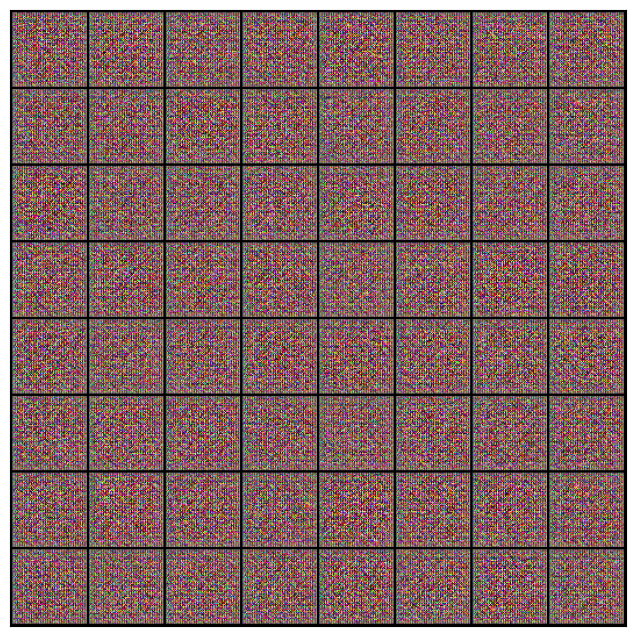

In [16]:
xb = torch.randn(batch_size, latent_size, 1, 1) # random latent tensors
fake_images = generator(xb)
print(fake_images.shape)
show_images(fake_images)

In [17]:
generator = to_device(generator, device)


<style>
    @keyframes textAnimation9 {
        0% { color: #D35430; }
        50% { color: #E67E52; }
        100% { color: #2E86C1; }
    }
</style>

<div style="border: 3px solid #D35400; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px pink; background-color: #F5EBEA; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Lucida Handwriting', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: #1E86D1; font-weight: bold; animation: textAnimation9 10s infinite alternate;">GAN Discriminator Training Function</p>
</div>

In [18]:
def train_discriminator(real_images, opt_d):
    # Clear discriminator gradients
    opt_d.zero_grad()

    # Pass real images through discriminator
    real_preds = discriminator(real_images)
    real_targets = torch.ones(real_images.size(0), 1, device=device)
    real_loss = F.binary_cross_entropy(real_preds, real_targets)
    real_score = torch.mean(real_preds).item()

    # Generate fake images
    latent = torch.randn(batch_size, latent_size, 1, 1, device=device)
    fake_images = generator(latent)

    # Pass fake images through discriminator
    fake_targets = torch.zeros(fake_images.size(0), 1, device=device)
    fake_preds = discriminator(fake_images)
    fake_loss = F.binary_cross_entropy(fake_preds, fake_targets)
    fake_score = torch.mean(fake_preds).item()

    # Update discriminator weights
    loss = real_loss + fake_loss
    loss.backward()
    opt_d.step()
    return loss.item(), real_score, fake_score

<style>
    @keyframes textAnimation9 {
        0% { color: #D35430; }
        50% { color: #E67E52; }
        100% { color: #2E86C1; }
    }
</style>

<div style="border: 3px solid #D35400; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px pink; background-color: #F5EBEA; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Lucida Handwriting', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: #1E86D1; font-weight: bold; animation: textAnimation9 10s infinite alternate;">Training the GAN Generator</p>
</div>

In [19]:
def train_generator(opt_g):
    # Clear generator gradients
    opt_g.zero_grad()

    # Generate fake images
    latent = torch.randn(batch_size, latent_size, 1, 1, device=device)
    fake_images = generator(latent)

    # Try to fool the discriminator
    preds = discriminator(fake_images)
    targets = torch.ones(batch_size, 1, device=device)
    loss = F.binary_cross_entropy(preds, targets)

    # Update generator weights
    loss.backward()
    opt_g.step()

    return loss.item()

In [20]:
from torchvision.utils import save_image
import os


In [21]:
sample_dir = 'generated'
os.makedirs(sample_dir, exist_ok=True)

<style>
    @keyframes textAnimation9 {
        0% { color: #D35430; }
        50% { color: #E67E52; }
        100% { color: #2E86C1; }
    }
</style>

<div style="border: 3px solid #D35400; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px pink; background-color: #F5EBEA; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Lucida Handwriting', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: #1E86D1; font-weight: bold; animation: textAnimation9 10s infinite alternate;">Image Generation and Visualization</p>
</div>

In [22]:
def save_samples(index, latent_tensors, show=True):
    fake_images = generator(latent_tensors)
    fake_fname = 'generated-images-{0:0=4d}.png'.format(index)
    save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=8)
    print('Saving', fake_fname)
    if show:
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(fake_images.cpu().detach(), nrow=8).permute(1, 2, 0))


In [23]:
fixed_latent = torch.randn(64, latent_size, 1, 1, device=device)


Saving generated-images-0000.png


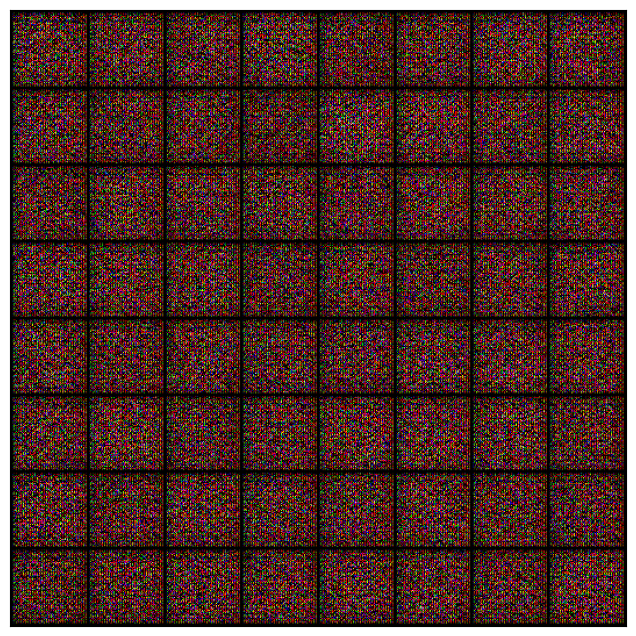

In [24]:

save_samples(0, fixed_latent)

In [25]:
from tqdm.notebook import tqdm
import torch.nn.functional as F

<style>
    @keyframes textAnimation9 {
        0% { color: #D35430; }
        50% { color: #E67E52; }
        100% { color: #2E86C1; }
    }
</style>

<div style="border: 3px solid #D35400; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px pink; background-color: #F5EBEA; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Lucida Handwriting', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: #1E86D1; font-weight: bold; animation: textAnimation9 10s infinite alternate;">Training a GAN with PyTorch</p>
</div>

In [26]:
def fit(epochs, lr, start_idx=1):
    torch.cuda.empty_cache()

    # Losses & scores
    losses_g = []
    losses_d = []
    real_scores = []
    fake_scores = []

    # Create optimizers
    opt_d = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))
    opt_g = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))

    for epoch in range(epochs):
        for real_images, _ in tqdm(train_dl):
            # Train discriminator
            loss_d, real_score, fake_score = train_discriminator(real_images, opt_d)
            # Train generator
            loss_g = train_generator(opt_g)

        # Record losses & scores
        losses_g.append(loss_g)
        losses_d.append(loss_d)
        real_scores.append(real_score)
        fake_scores.append(fake_score)

        # Log losses & scores (last batch)
        print("Epoch [{}/{}], loss_g: {:.4f}, loss_d: {:.4f}, real_score: {:.4f}, fake_score: {:.4f}".format(
            epoch+1, epochs, loss_g, loss_d, real_score, fake_score))

        # Save generated images
        save_samples(epoch+start_idx, fixed_latent, show=False)

    return losses_g, losses_d, real_scores, fake_scores

In [27]:
lr = 0.0002
epochs = 5

In [28]:
history = fit(epochs, lr)

  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [1/5], loss_g: 4.6670, loss_d: 0.1990, real_score: 0.8922, fake_score: 0.0660
Saving generated-images-0001.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [2/5], loss_g: 6.4718, loss_d: 0.4982, real_score: 0.8752, fake_score: 0.2743
Saving generated-images-0002.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [3/5], loss_g: 9.2177, loss_d: 0.7244, real_score: 0.9681, fake_score: 0.4367
Saving generated-images-0003.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [4/5], loss_g: 5.2886, loss_d: 0.2259, real_score: 0.8978, fake_score: 0.0870
Saving generated-images-0004.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [5/5], loss_g: 4.7156, loss_d: 0.2054, real_score: 0.8814, fake_score: 0.0556
Saving generated-images-0005.png


In [29]:
losses_g, losses_d, real_scores, fake_scores = history

In [30]:
torch.save(generator.state_dict(), 'G.pth')
torch.save(discriminator.state_dict(), 'D.pth')

<style>
    @keyframes textAnimation9 {
        0% { color: #D35430; }
        50% { color: #E67E52; }
        100% { color: #2E86C1; }
    }
</style>

<div style="border: 3px solid #D35400; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px pink; background-color: #F5EBEA; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Lucida Handwriting', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: #1E86D1; font-weight: bold; animation: textAnimation9 10s infinite alternate;">Prediction's</p>
</div>

In [31]:
from IPython.display import Image

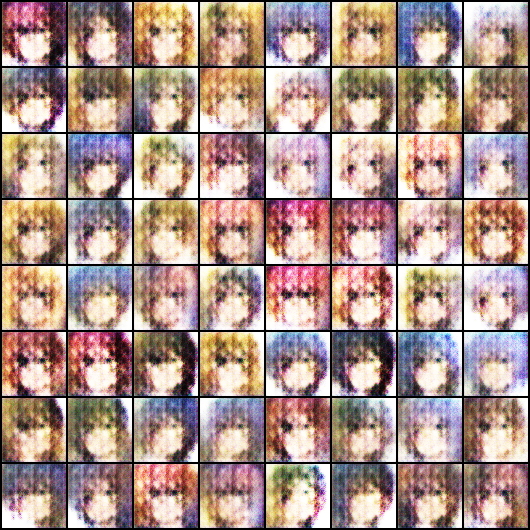

In [32]:
Image('./generated/generated-images-0001.png')

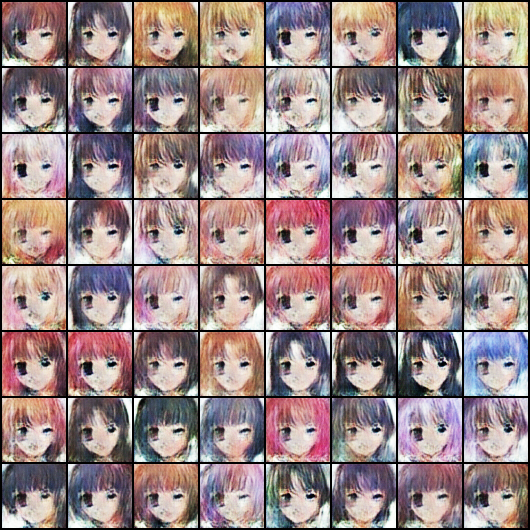

In [33]:
Image('./generated/generated-images-0005.png')

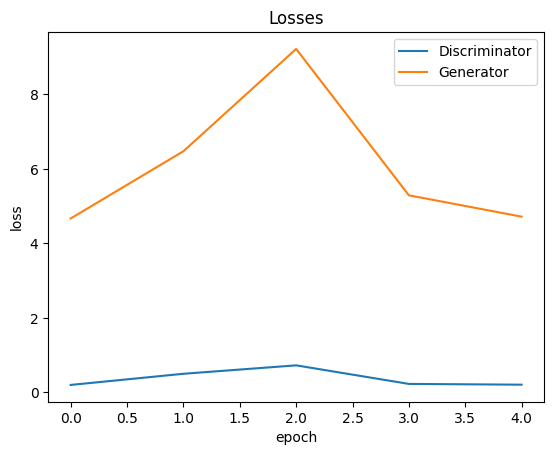

In [34]:
plt.plot(losses_d, '-')
plt.plot(losses_g, '-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Discriminator', 'Generator'])
plt.title('Losses');

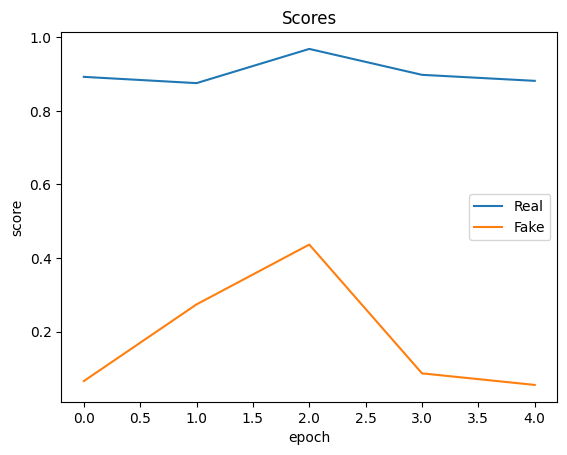

In [35]:
plt.plot(real_scores, '-')
plt.plot(fake_scores, '-')
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend(['Real', 'Fake'])
plt.title('Scores');